# Competição Titanic Kaggle

In [ ]:
!pip install kaggle pandas scikit-learn numpy

In [ ]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
api.competition_download_file('titanic','train.csv')

100%|██████████| 59.8k/59.8k [00:00<00:00, 210kB/s]

In [11]:
import pandas as pd

df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
!pip install matplotlib

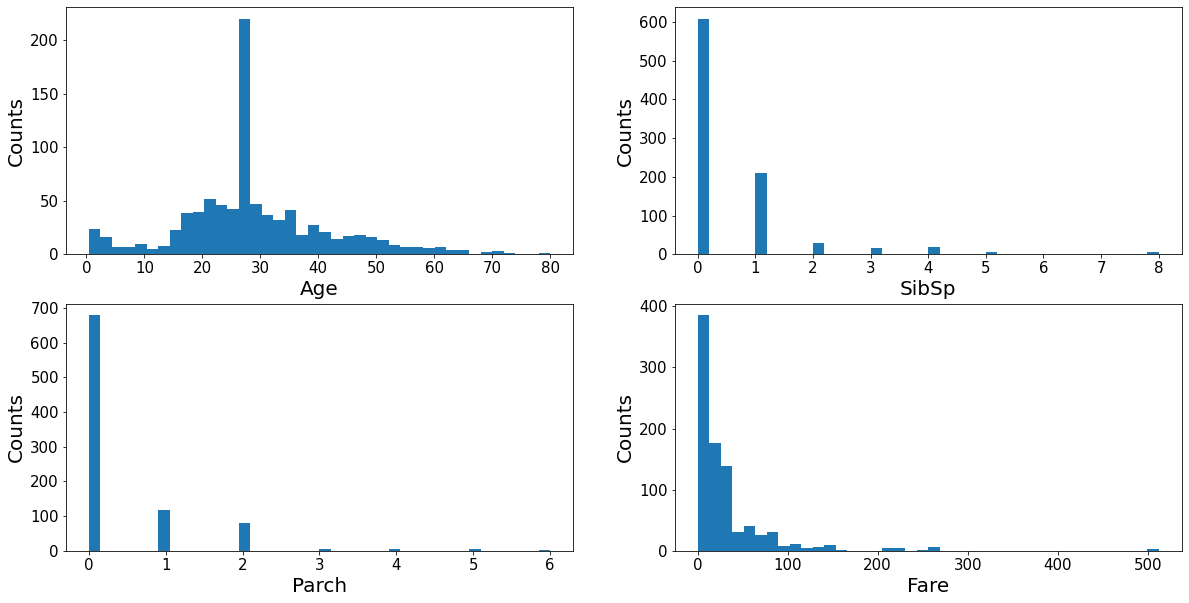

In [23]:
# import visulization packages
import matplotlib.pyplot as plt

# set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)


In [25]:
import numpy as np

def fill_na_most(data, inplace=True):
    return df.fillna('S', inplace=inplace)

fill_na_most(df['Embarked'])

# check the result
df['Embarked'].describe()

def log_transformation(data):
    return data.apply(np.log1p)

df['Fare_log1p'] = log_transformation(df['Fare'])

In [26]:
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df[cat_features]
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
data_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [27]:
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([df[features_model], data_cat_dummies], axis=1)

# check the data
data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1


In [29]:
data_model_y = df.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

data_model_y.head()

0    Not_survived
1        Survived
2        Survived
3        Survived
4    Not_survived
Name: Survived, dtype: object

In [30]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


In [34]:
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

print(y_train.value_counts())
print(y_val.value_counts())

Not_survived    373
Survived        250
Name: Survived, dtype: int64
Not_survived    176
Survived         92
Name: Survived, dtype: int64


In [35]:
# import packages
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


clf = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
# Instantiate the classification model 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_val)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.8283582089552238


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[155,  21],
       [ 25,  67]], dtype=int64)

In [41]:
from pprint import pprint
from sklearn.model_selection import GridSearchCV

print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Number of trees in random forest
n_estimators = [50,100,200]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(param_grid)

{'bootstrap': [True],
 'max_depth': [10, 20, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 100, 200]}


In [58]:
rf = RandomForestClassifier()

#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=123, n_jobs = -1)
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)


rf_grid.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 20, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [59]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#y_pred=rf_grid.predict(X_val)

scores = cross_val_score(rf_grid, X_train, y_train, cv=5)


scores.mean()
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Fitting 3 folds for each of 162 candidates, totalling 486 fits
Accuracy: 0.8395522388059702


In [5]:
api.competition_download_file('titanic','test.csv')

100%|██████████| 28.0k/28.0k [00:00<00:00, 870kB/s]

In [65]:
teste = pd.read_csv('test.csv')



In [67]:
#metrics.accuracy_score(y_val, y_pred)
teste.head()
previsoes=rf_grid.predict(teste)

C:\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Cabin
- Embarked
- Fare
- Name
- PassengerId
- ...
Feature names seen at fit time, yet now missing:
- Embarked_C
- Embarked_Q
- Embarked_S
- Fare_log1p
- Pclass_1st
- ...

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: 'Kelly, Mr. James'

In [ ]:
# Put the PassengerId and predicted probability together to generate submission data
LR_submission1 = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predict})
# Save your result
LR_submission1.to_csv('LR_submission1.csv', index=False)